In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
air = pd.read_excel('AirlinesData.csv')

In [5]:
air.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
air.head(15)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [8]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [9]:
air.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [36]:
air['Month'] = pd.to_datetime(air['Month'])

In [38]:
air = air.set_index('Month')

In [39]:
air.head()

,Passengers,Months
Month,,
1995-01-01,112,Jan
1995-02-01,118,Feb
1995-03-01,132,Mar
1995-04-01,129,Apr
1995-05-01,121,May


<Axes: xlabel='Month', ylabel='Passengers'>

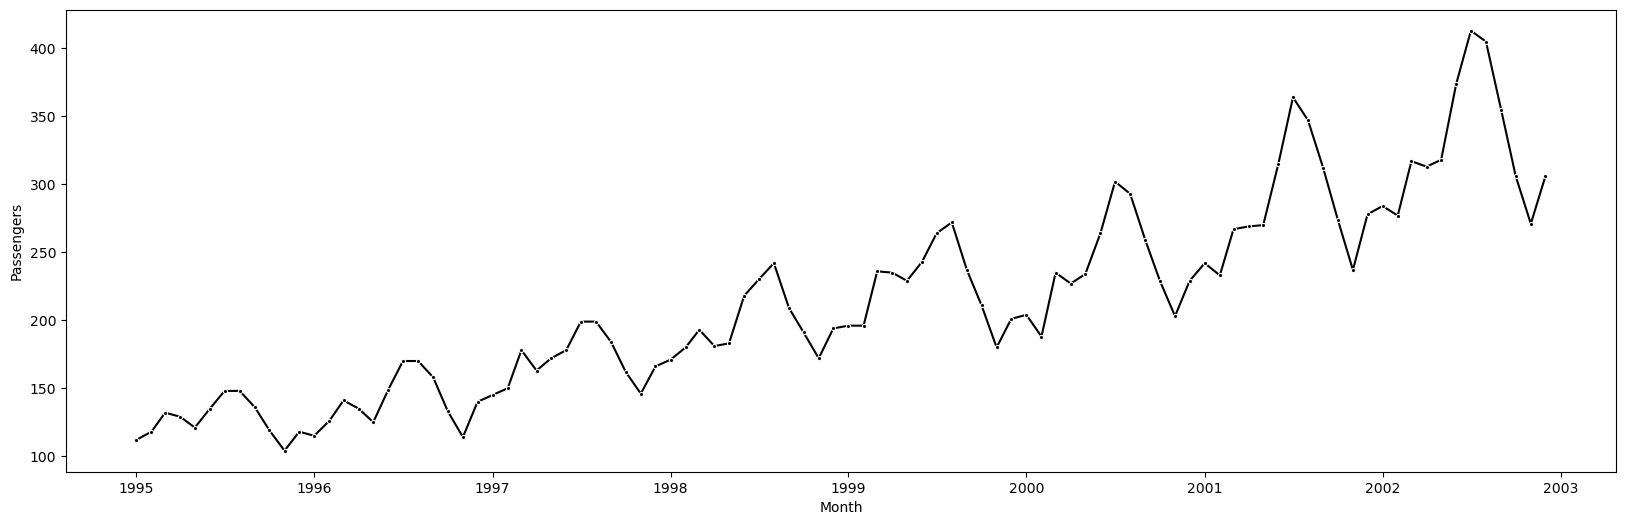

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.lineplot(x = "Month",y = "Passengers", data = air, color = "black", marker = ".")

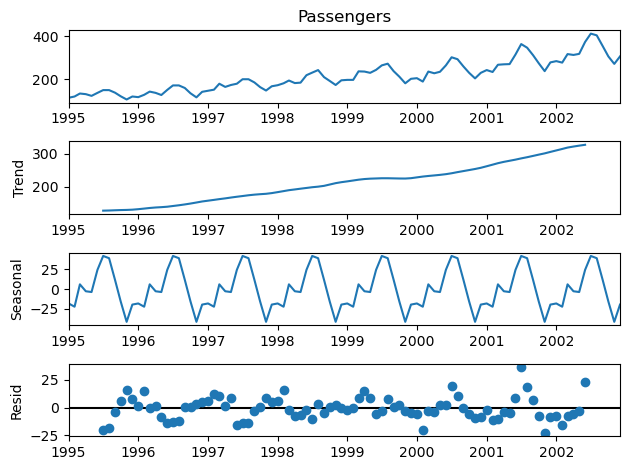

In [40]:
ts_add = seasonal_decompose(air.Passengers, model="additive")
fig = ts_add.plot()
plt.show()

In [28]:
air['Month'] = pd.to_datetime(air['Month'])
air['Months'] = air['Month'].dt.strftime('%b')
air.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


<Axes: >

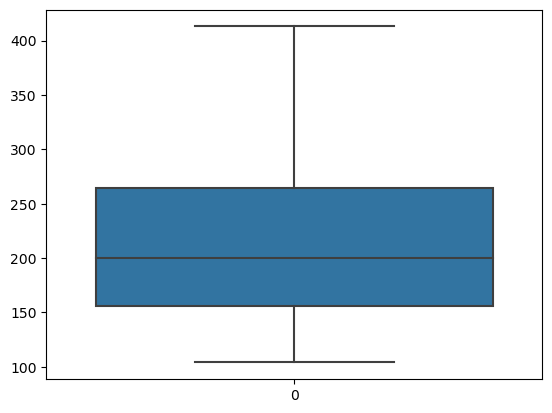

In [30]:
sns.boxplot(data = air['Passengers'])

In [31]:
month_dummies = pd.DataFrame(pd.get_dummies(air['Months']))
df1 = pd.concat([air,month_dummies],axis = 1)
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
df1["t"] = np.arange(1,97)
df1["t_squared"] = df1["t"] * df1["t"]
df1["log_Passengers"] = np.log(df1["Passengers"])
df1.columns
df1.head()

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
